In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from arch import arch_model

In [2]:
MAE = pd.read_csv('./results/mae.csv')

### Gold (1 step)

In [31]:
gold_result1 = pd.read_csv('./results/gold_1step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
gold_mae = MAE.iloc[0]

In [33]:
table = gold_result1
x = np.arange(len(table['ds']))+1290-129

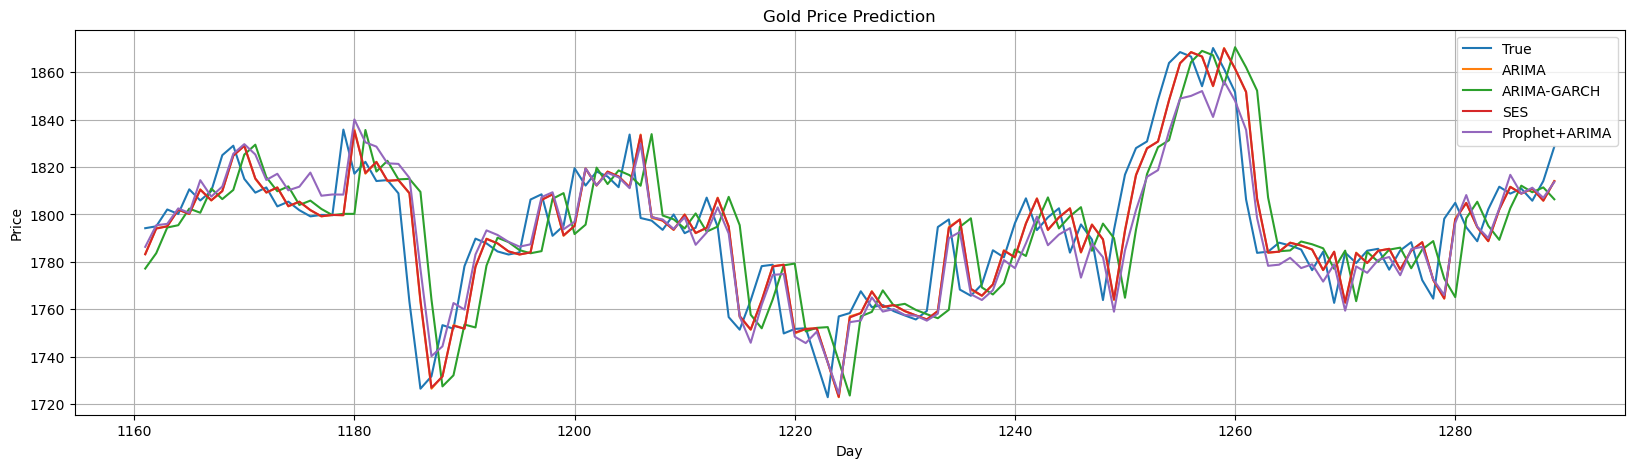

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [34]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 3'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/gold_1step.png')
plt.show()

print('MAE')
gold_mae

### Gold (5-step)

In [6]:
gold_result2 = pd.read_csv('./results/gold_5step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
gold_mae = MAE.iloc[1]

In [7]:
table = gold_result2
x = np.arange(len(table['ds']))+1290-129

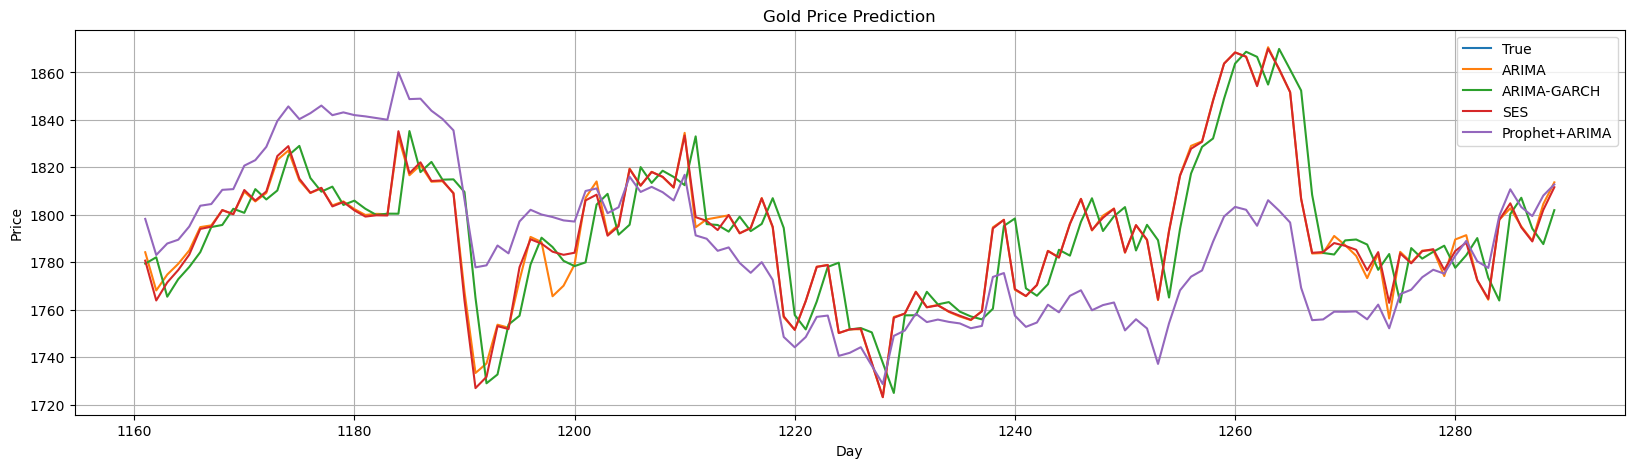

MAE


Unnamed: 0                             Gold 5 step
ARIMA                                    23.683721
ARIMA 2                                  23.620698
ARIMA 3                                  23.690654
ARIMA-GARCH                              26.102638
ARIMA-GARCH 2                            26.074283
ARIMA-GARCH 3                            26.084716
Simple Exponential Smoothing             23.690077
Holt's Exponential Smoothing             25.275013
Holt-Winter's Exponential Smoothing      26.099474
Prophet                                  40.342795
Prophet+ARIMA                            26.157996
Name: 1, dtype: object

In [8]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA 2'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
# plt.plot(x,table['Prophet'], label = 'Prophet')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/gold_5step.png')
plt.show()

print('MAE')
gold_mae

### Gold (10 step)

In [9]:
gold_result3 = pd.read_csv('./results/gold_10step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
gold_mae = MAE.iloc[2]

In [10]:
table = gold_result3
x = np.arange(len(table['ds']))+1290-129

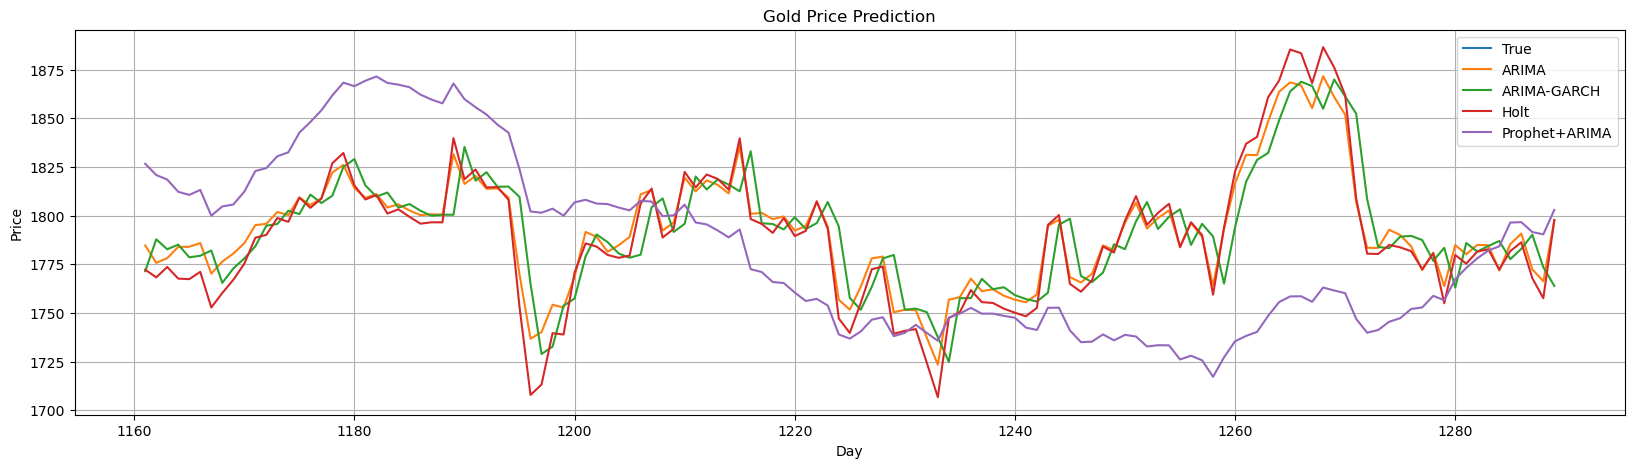

MAE


Unnamed: 0                             Gold 10 step
ARIMA                                     31.966667
ARIMA 2                                   31.682963
ARIMA 3                                   31.958007
ARIMA-GARCH                               33.445415
ARIMA-GARCH 2                             33.260493
ARIMA-GARCH 3                             33.424276
Simple Exponential Smoothing              31.958098
Holt's Exponential Smoothing              36.108448
Holt-Winter's Exponential Smoothing       38.313604
Prophet                                   47.866706
Prophet+ARIMA                             39.244826
Name: 2, dtype: object

In [11]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA 2'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
#plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
plt.plot(x,table['Holt\'s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/gold_10step.png')
plt.show()

print('MAE')
gold_mae

### Silver (1 step)

In [12]:
silver_result1 = pd.read_csv('./results/silver_1step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
silver_mae = MAE.iloc[3]

In [13]:
table = silver_result1
x = np.arange(len(table['ds'])) + 1280 -128

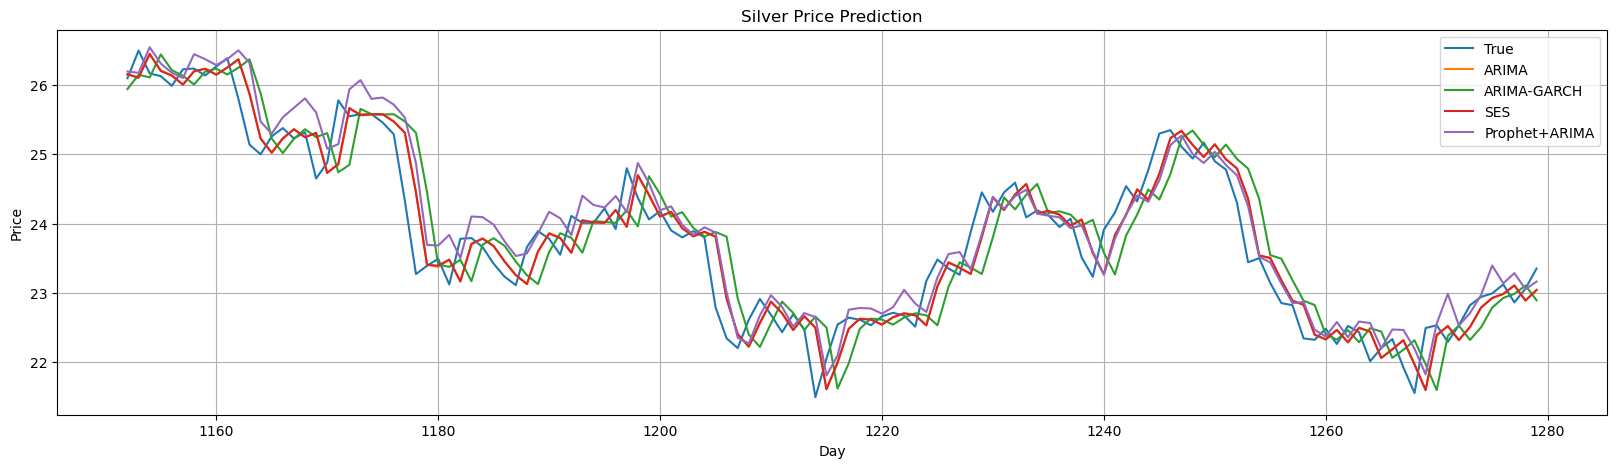

MAE


Unnamed: 0                             Silver 1 step
ARIMA                                       0.288135
ARIMA 2                                     0.293607
ARIMA 3                                     0.296607
ARIMA-GARCH                                 0.402143
ARIMA-GARCH 2                               0.404371
ARIMA-GARCH 3                               0.406358
Simple Exponential Smoothing                0.286769
Holt's Exponential Smoothing                0.287694
Holt-Winter's Exponential Smoothing         0.287942
Prophet                                     1.494692
Prophet+ARIMA                               0.335884
Name: 3, dtype: object

In [14]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/silver_1step.png')
plt.show()

print('MAE')
silver_mae

### Silver (5 step)

In [15]:
silver_result2 = pd.read_csv('./results/silver_5step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
silver_mae = MAE.iloc[4]

In [16]:
table = silver_result2
x = np.arange(len(table['ds'])) + 1280 -128

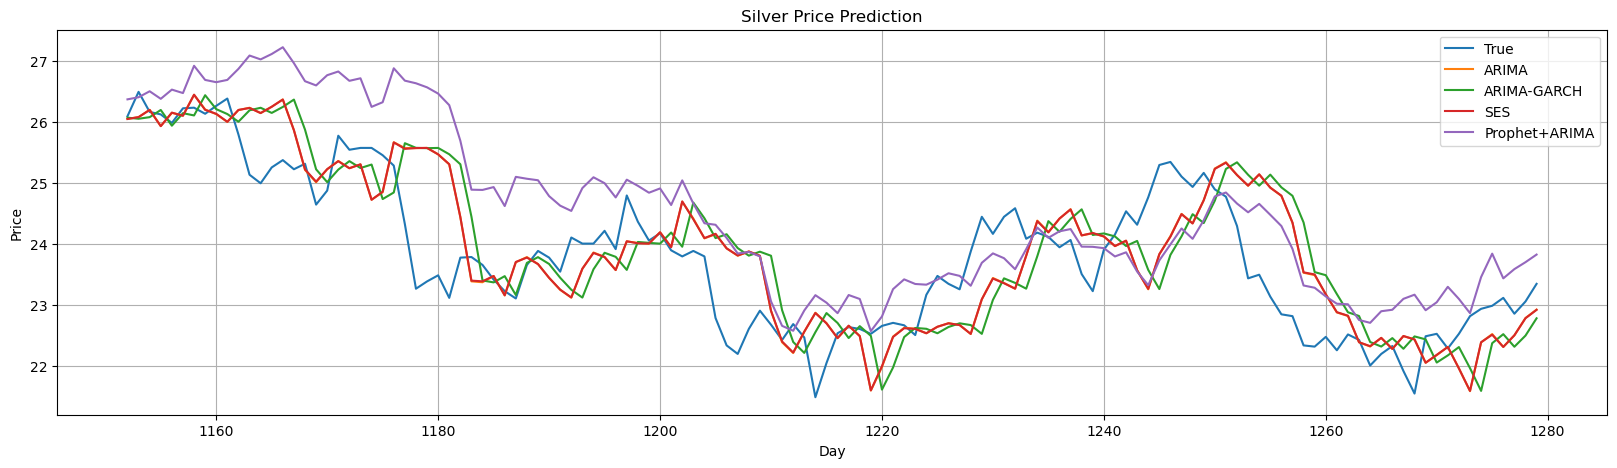

MAE


Unnamed: 0                             Silver 5 step
ARIMA                                       0.637767
ARIMA 2                                     0.640121
ARIMA 3                                     0.640907
ARIMA-GARCH                                 0.703759
ARIMA-GARCH 2                               0.706813
ARIMA-GARCH 3                               0.708511
Simple Exponential Smoothing                0.637558
Holt's Exponential Smoothing                0.638903
Holt-Winter's Exponential Smoothing          0.63892
Prophet                                     1.715335
Prophet+ARIMA                               0.901843
Name: 4, dtype: object

In [17]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
# plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
# plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/silver_5step.png')
plt.show()

print('MAE')
silver_mae

### Silver (10 step)

In [18]:
silver_result3 = pd.read_csv('./results/silver_10step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
silver_mae = MAE.iloc[5]

In [19]:
table = silver_result3
x = np.arange(len(table['ds'])) + 1280 -128

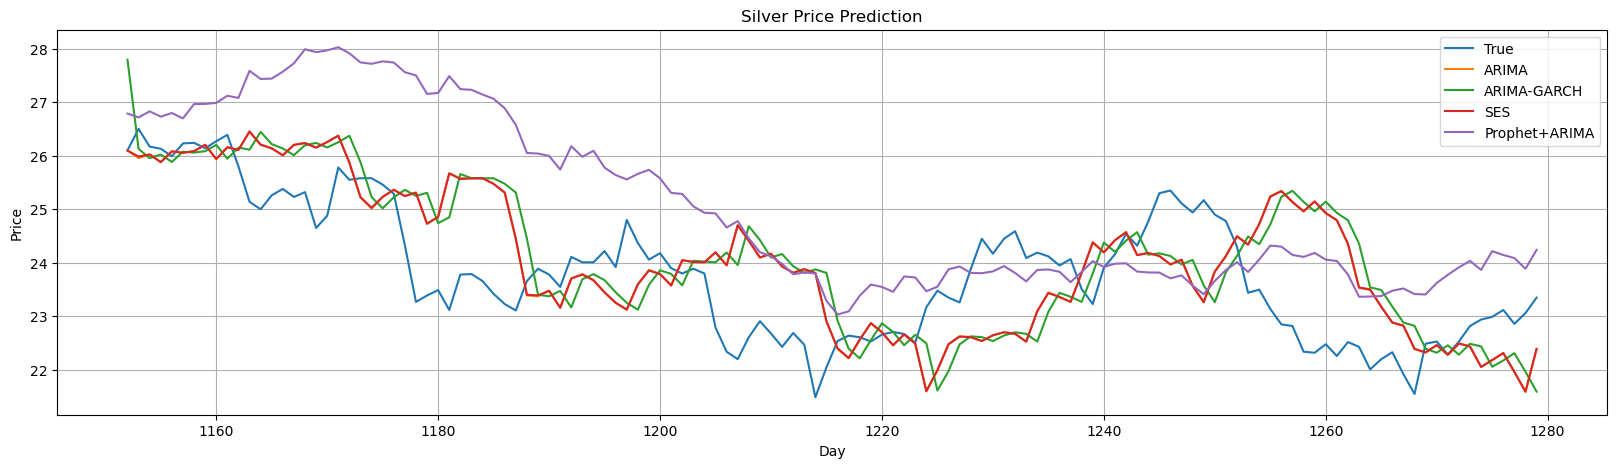

MAE


Unnamed: 0                             Silver 10 step
ARIMA                                        0.950225
ARIMA 2                                      0.953825
ARIMA 3                                      0.939363
ARIMA-GARCH                                  1.007639
ARIMA-GARCH 2                                1.012921
ARIMA-GARCH 3                                1.008948
Simple Exponential Smoothing                 0.949214
Holt's Exponential Smoothing                  0.95716
Holt-Winter's Exponential Smoothing          0.957262
Prophet                                      1.948352
Prophet+ARIMA                                1.479554
Name: 5, dtype: object

In [20]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/silver_10step.png')
plt.show()

print('MAE')
silver_mae

### Platinum (1 step)

In [21]:
platinum_result1 = pd.read_csv('./results/platinum_1step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
platinum_mae = MAE.iloc[6]

In [22]:
table = platinum_result1
x = np.arange(len(table['ds'])) + 1557- 155

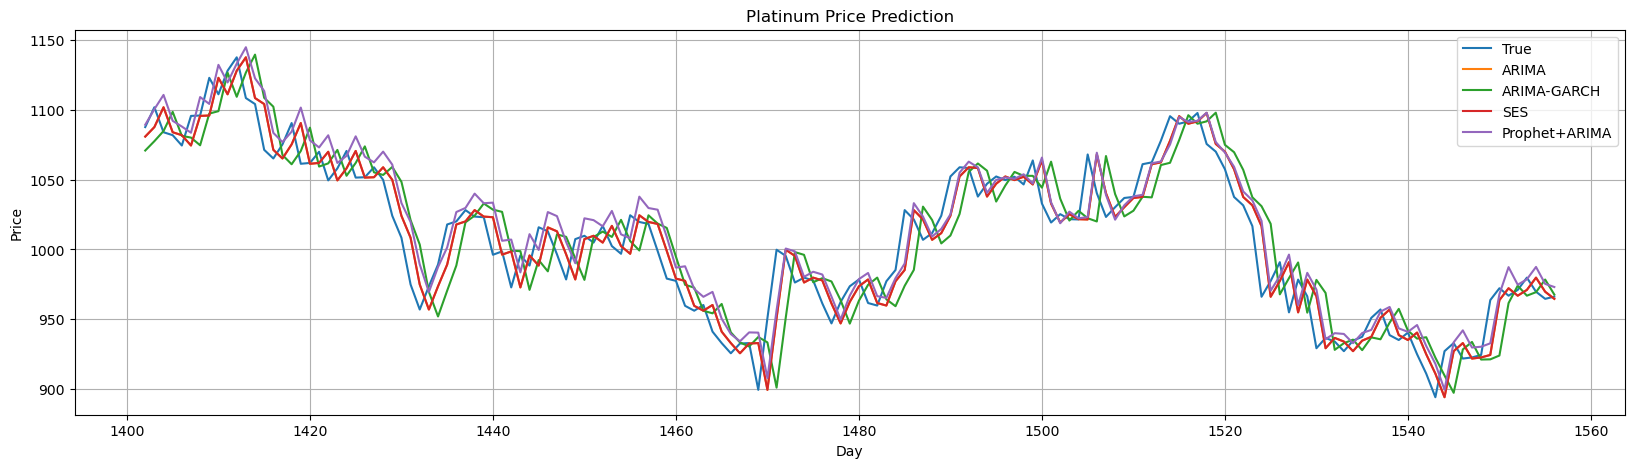

MAE


Unnamed: 0                             Platinum 1 step
ARIMA                                        13.460226
ARIMA 2                                      13.408387
ARIMA 3                                      13.413057
ARIMA-GARCH                                  19.778759
ARIMA-GARCH 2                                19.743761
ARIMA-GARCH 3                                19.809362
Simple Exponential Smoothing                 13.407837
Holt's Exponential Smoothing                 13.671182
Holt-Winter's Exponential Smoothing           13.66807
Prophet                                      94.097753
Prophet+ARIMA                                15.311571
Name: 6, dtype: object

In [23]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA 2'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/platinum_1step.png')
plt.show()

print('MAE')
platinum_mae

### Platinum (5 step)

In [24]:
platinum_result2 = pd.read_csv('./results/platinum_5step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
platinum_mae = MAE.iloc[7]

In [25]:
table = platinum_result2
x = np.arange(len(table['ds'])) + 1557- 155

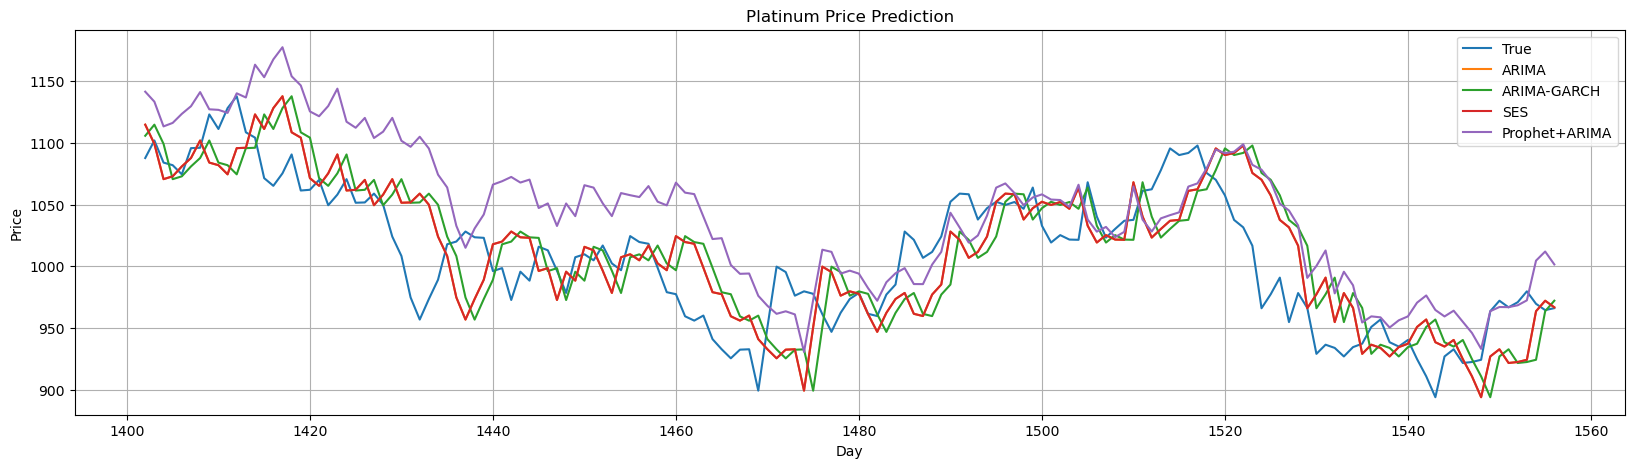

MAE


Unnamed: 0                             Platinum 5 step
ARIMA                                        30.767535
ARIMA 2                                      30.323871
ARIMA 3                                      30.420002
ARIMA-GARCH                                  32.440762
ARIMA-GARCH 2                                32.163791
ARIMA-GARCH 3                                32.181592
Simple Exponential Smoothing                  30.32232
Holt's Exponential Smoothing                 32.509699
Holt-Winter's Exponential Smoothing           32.46095
Prophet                                      107.07802
Prophet+ARIMA                                 43.44115
Name: 7, dtype: object

In [26]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA 2'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/platinum_5step.png')
plt.show()

print('MAE')
platinum_mae

### Platinum (10 step)

In [27]:
platinum_result3 = pd.read_csv('./results/platinum_10step_forecasting.csv')
MAE = pd.read_csv('./results/mae.csv')
platinum_mae = MAE.iloc[8]

In [28]:
table = platinum_result3
x = np.arange(len(table['ds'])) + 1557- 155

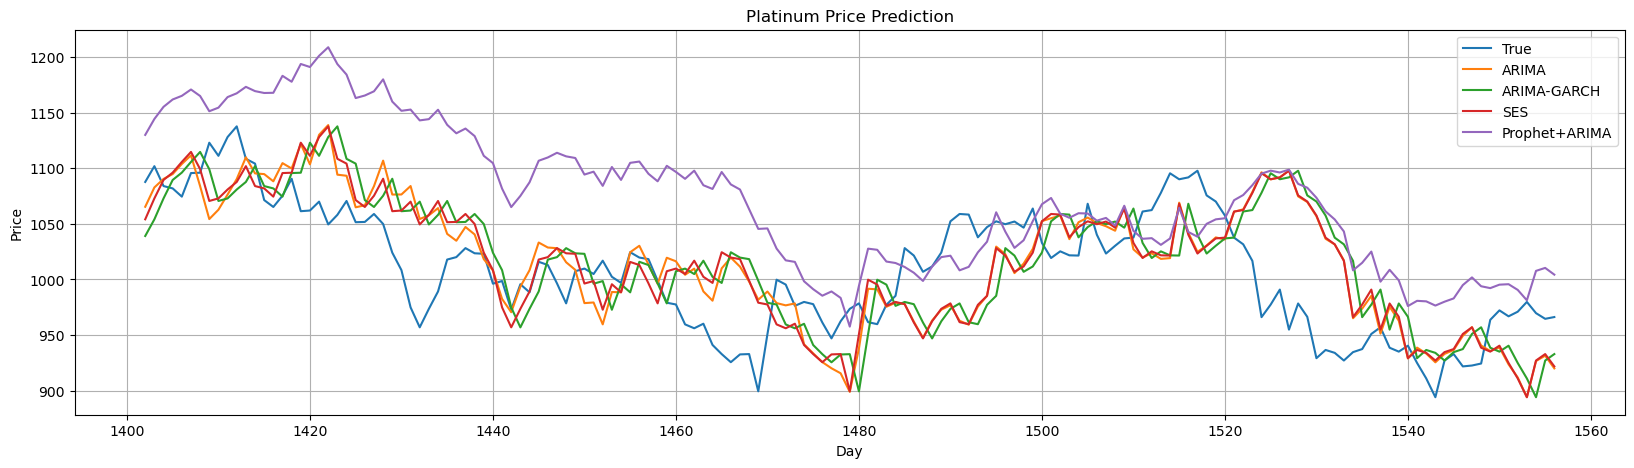

MAE


Unnamed: 0                             Platinum 10 step
ARIMA                                         40.467927
ARIMA 2                                       40.788065
ARIMA 3                                       40.840577
ARIMA-GARCH                                   42.388992
ARIMA-GARCH 2                                 41.981232
ARIMA-GARCH 3                                 41.986154
Simple Exponential Smoothing                  40.788224
Holt's Exponential Smoothing                  46.258106
Holt-Winter's Exponential Smoothing           46.419243
Prophet                                      121.488955
Prophet+ARIMA                                 72.297505
Name: 8, dtype: object

In [29]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/platinum_10step.png')
plt.show()

print('MAE')
platinum_mae

### 0 (1 step)

In [3]:
exchange0_result = pd.read_csv('./results/exchange0_1step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_1step_rate_mae.csv')
exchange0_mae = MAE.iloc[0]

In [4]:
table = exchange0_result
x = np.arange(len(table['ds']))+7588 - 1517

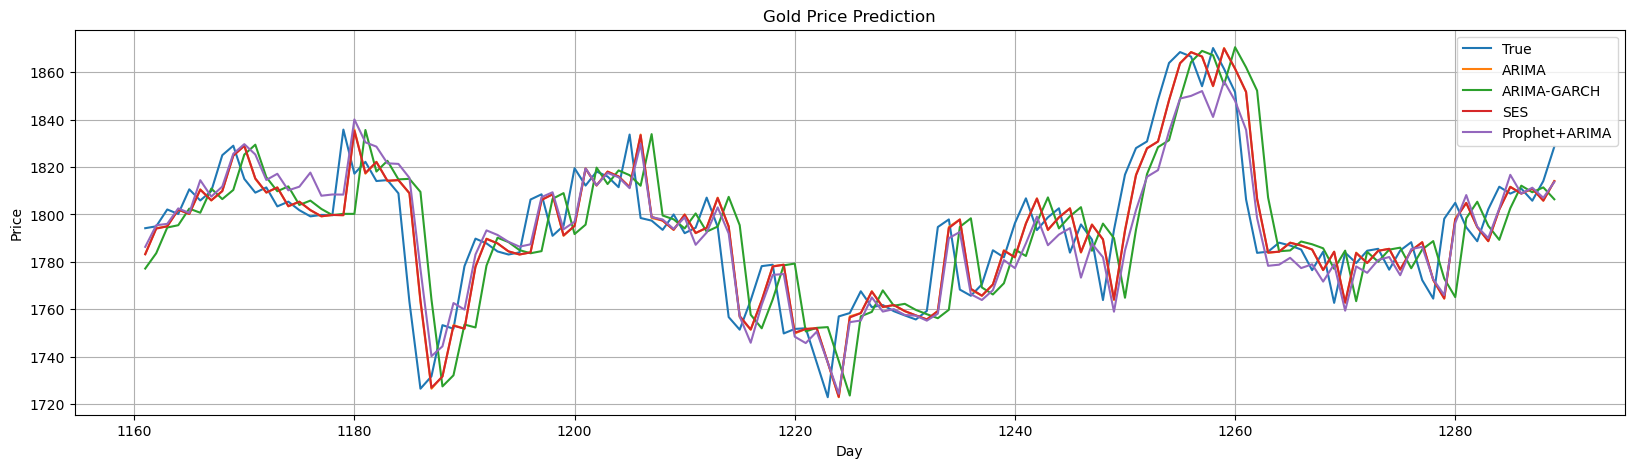

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 0 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/0_1step.png')
plt.show()

print('MAE')
exchange0_mae

### 1 (1 step)

In [3]:
exchange1_result = pd.read_csv('./results/exchange1_1step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_1step_rate_mae.csv')
exchange1_mae = MAE.iloc[1]

In [4]:
table = exchange1_result
x = np.arange(len(table['ds']))+ 7588 - 1517

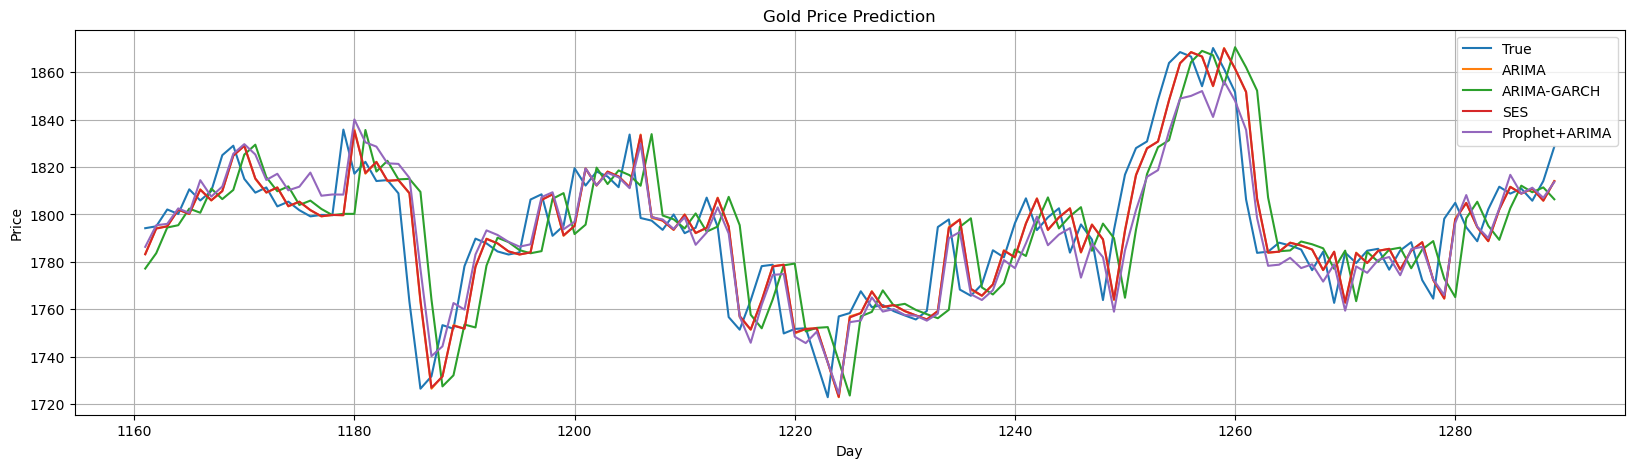

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 1 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/1_1step.png')
plt.show()

print('MAE')
exchange1_mae

### 2 (1 step)

In [3]:
exchange2_result = pd.read_csv('./results/exchange2_1step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_1step_rate_mae.csv')
exchange2_mae = MAE.iloc[2]

In [4]:
table = exchange2_result
x = np.arange(len(table['ds']))+ 7588 - 1517

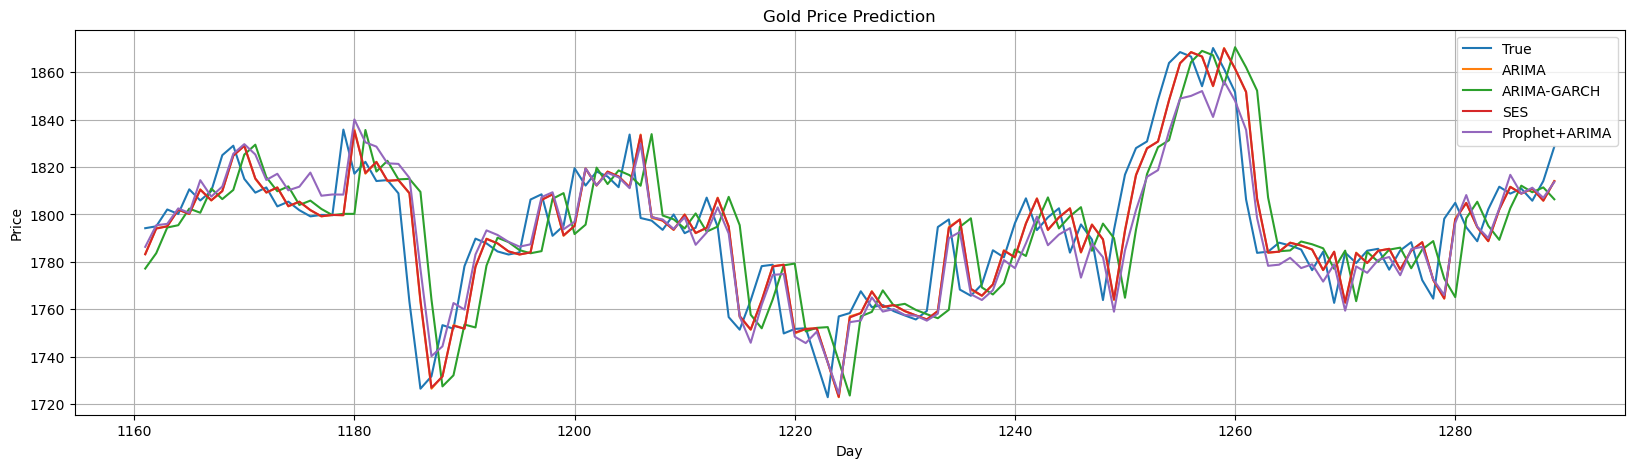

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 2 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/2_1step.png')
plt.show()

print('MAE')
exchange2_mae

### 3 (1 step)

In [3]:
exchange3_result = pd.read_csv('./results/exchange3_1step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_1step_rate_mae.csv')
exchange3_mae = MAE.iloc[3]

In [4]:
table = exchange3_result
x = np.arange(len(table['ds']))+7588 - 1517

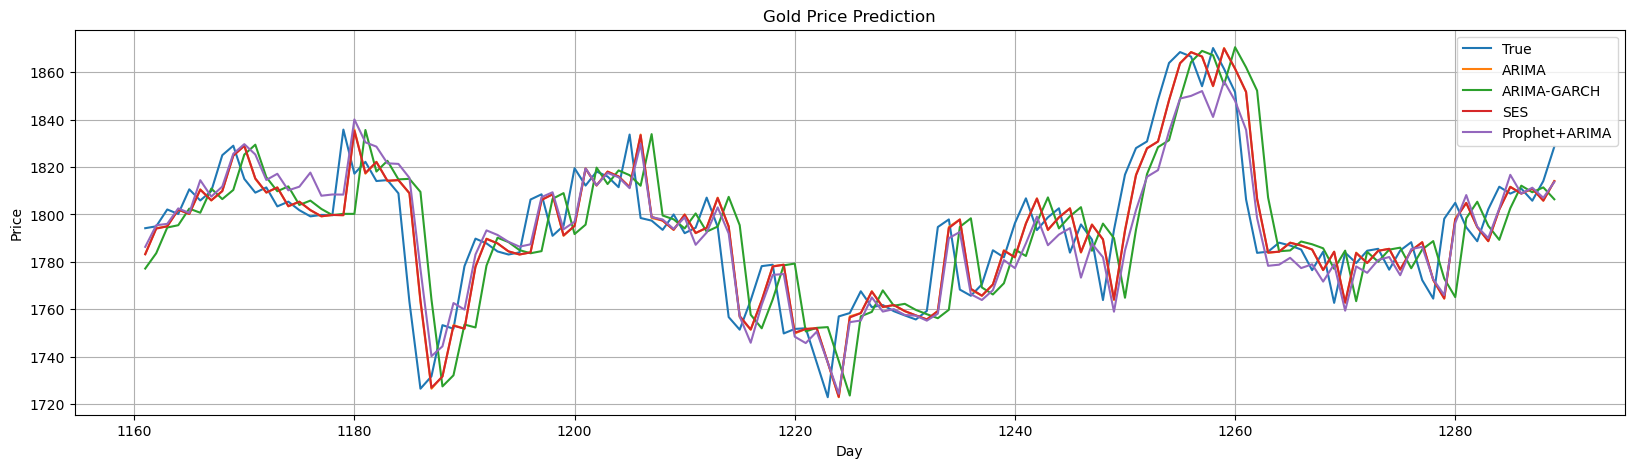

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 3 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/3_1step.png')
plt.show()

print('MAE')
exchange3_mae

### 4 (1 step)

In [3]:
exchange4_result = pd.read_csv('./results/exchange4_1step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_1step_rate_mae.csv')
exchange4_mae = MAE.iloc[4]

In [4]:
table = exchange4_result
x = np.arange(len(table['ds']))+7588 - 1517

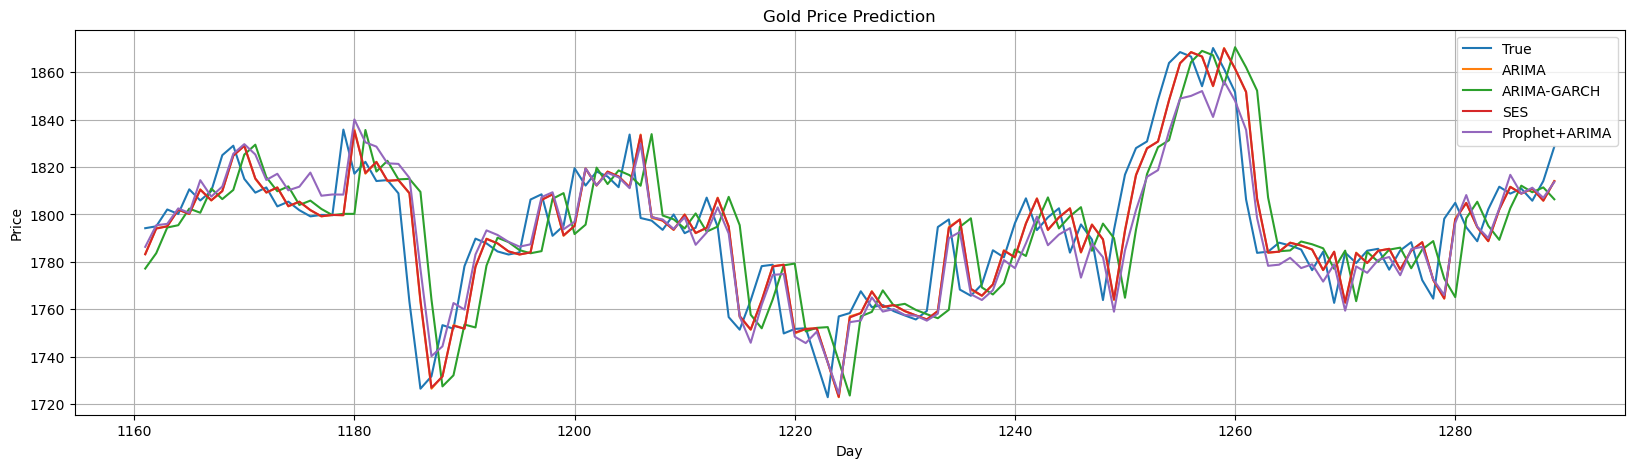

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 4 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/4_1step.png')
plt.show()

print('MAE')
exchange4_mae

### 5 (1 step)

In [3]:
exchange5_result = pd.read_csv('./results/exchange5_1step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_1step_rate_mae.csv')
exchange5_mae = MAE.iloc[5]

In [4]:
table = exchange5_result
x = np.arange(len(table['ds']))+ 7588 - 1517

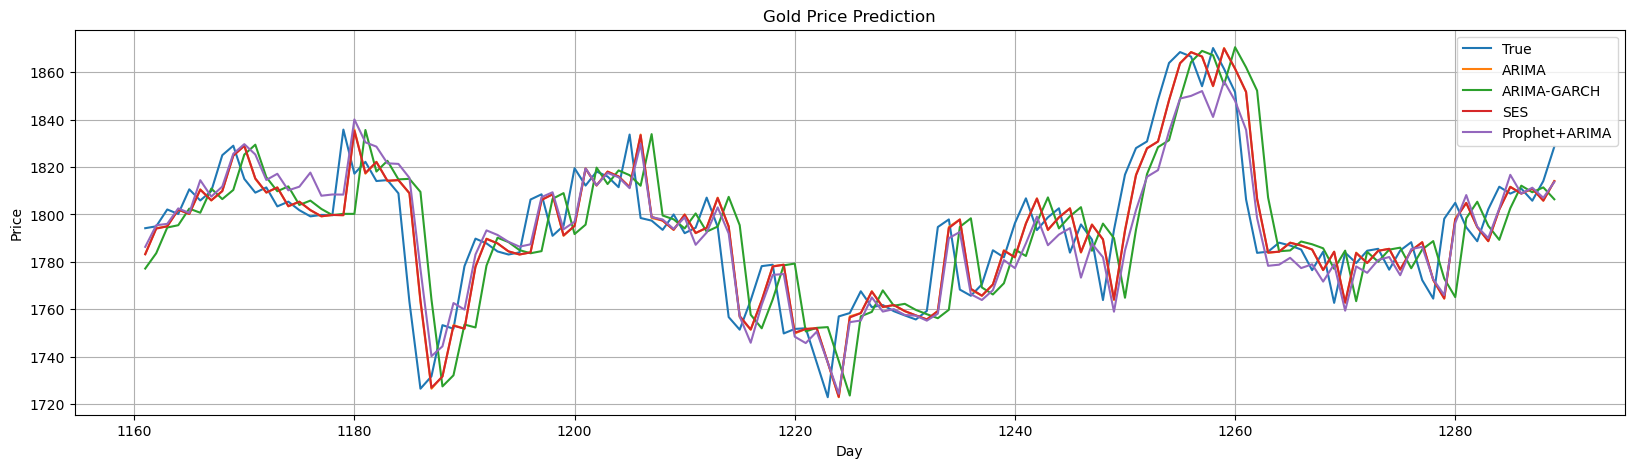

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 5 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/5_1step.png')
plt.show()

print('MAE')
exchange5_mae

### 6 (1 step)

In [3]:
exchange6_result = pd.read_csv('./results/exchange6_1step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_1step_rate_mae.csv')
exchange6_mae = MAE.iloc[6]

In [4]:
table = exchange6_result
x = np.arange(len(table['ds']))+7588 - 1517

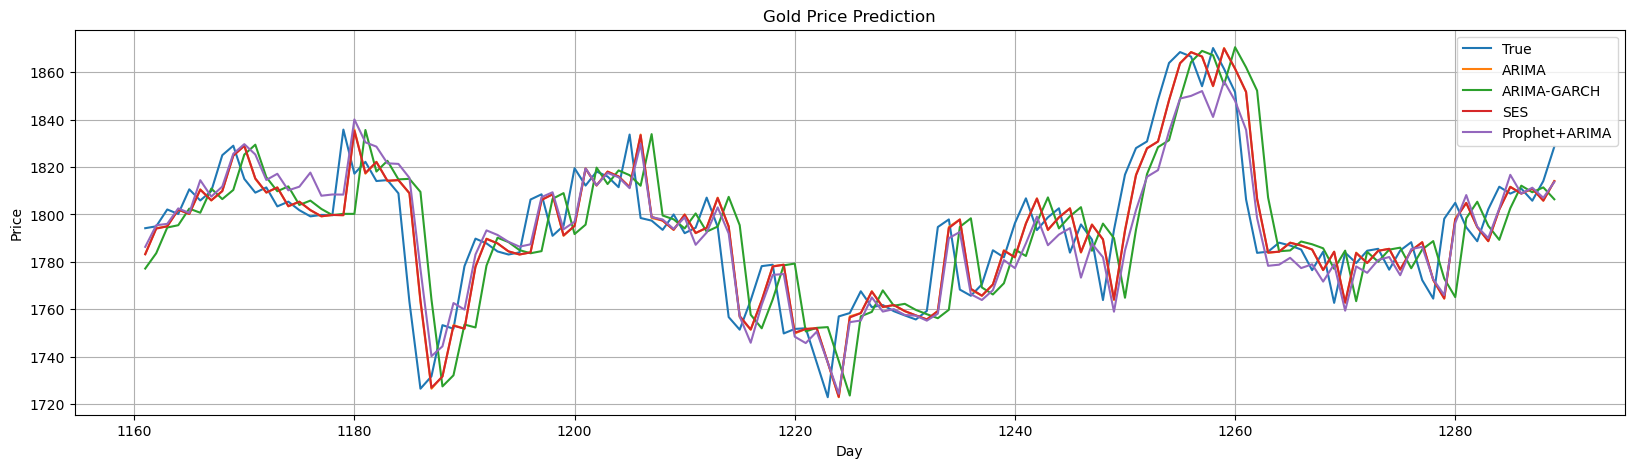

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 6 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/6_1step.png')
plt.show()

print('MAE')
exchange6_mae

### OT (1 step)

In [3]:
exchangeOT_result = pd.read_csv('./results/exchangeOT_1step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_1step_rate_mae.csv')
exchangeOT_mae = MAE.iloc[7]

In [4]:
table = exchangeOT_result
x = np.arange(len(table['ds']))+7588 - 1517

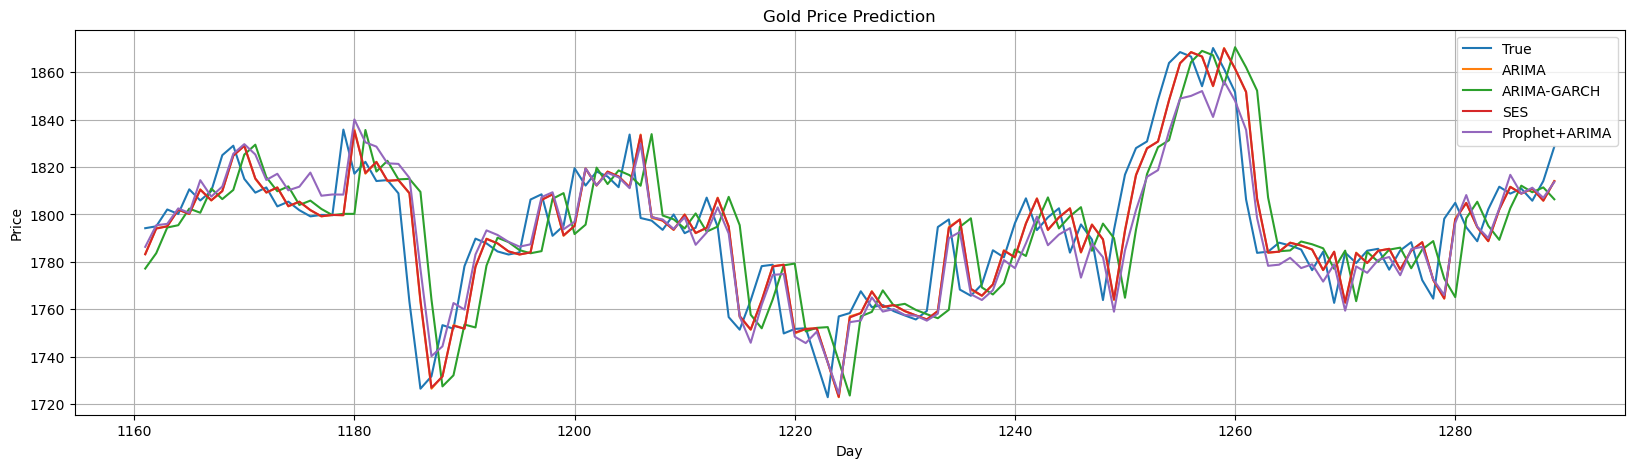

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange OT Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/OT_1step.png')
plt.show()

print('MAE')
exchangeOT_mae

### 0 (5 step)

In [3]:
exchange0_result = pd.read_csv('./results/exchange0_5step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_5step_rate_mae.csv')
exchange0_mae = MAE.iloc[0]

In [4]:
table = exchange0_result
x = np.arange(len(table['ds']))+ 7588 - 1517

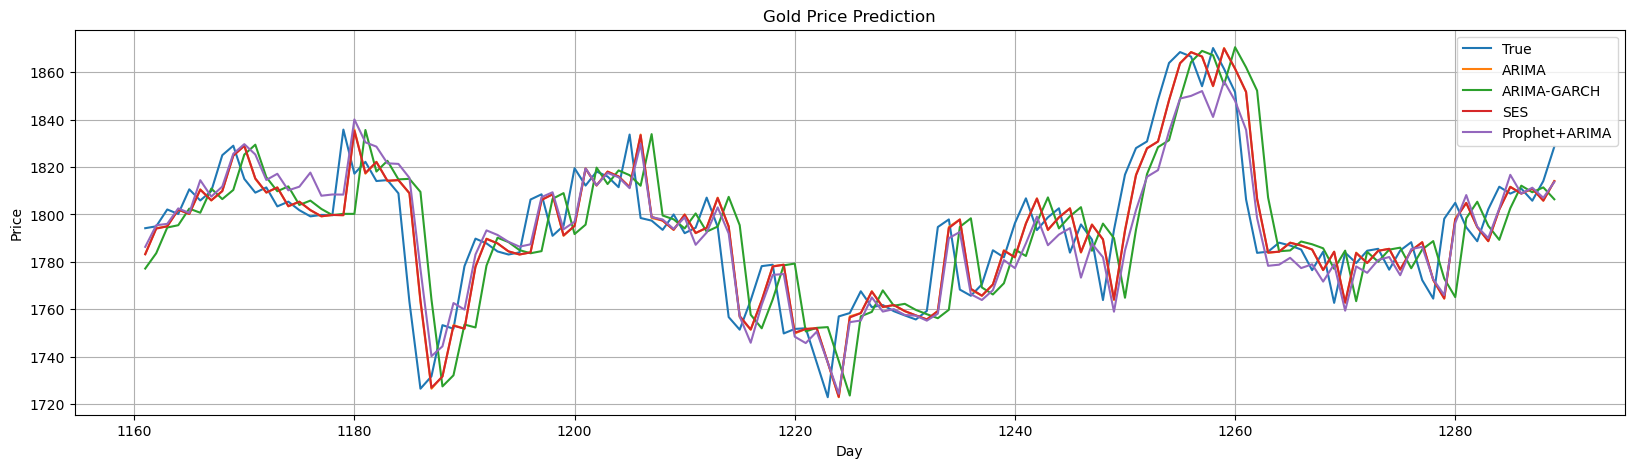

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 0 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/0_5step.png')
plt.show()

print('MAE')
exchange0_mae

### 1 (5 step)

In [3]:
exchange1_result = pd.read_csv('./results/exchange1_5step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_5step_rate_mae.csv')
exchange1_mae = MAE.iloc[1]

In [4]:
table = exchange1_result
x = np.arange(len(table['ds']))+7588 - 1517

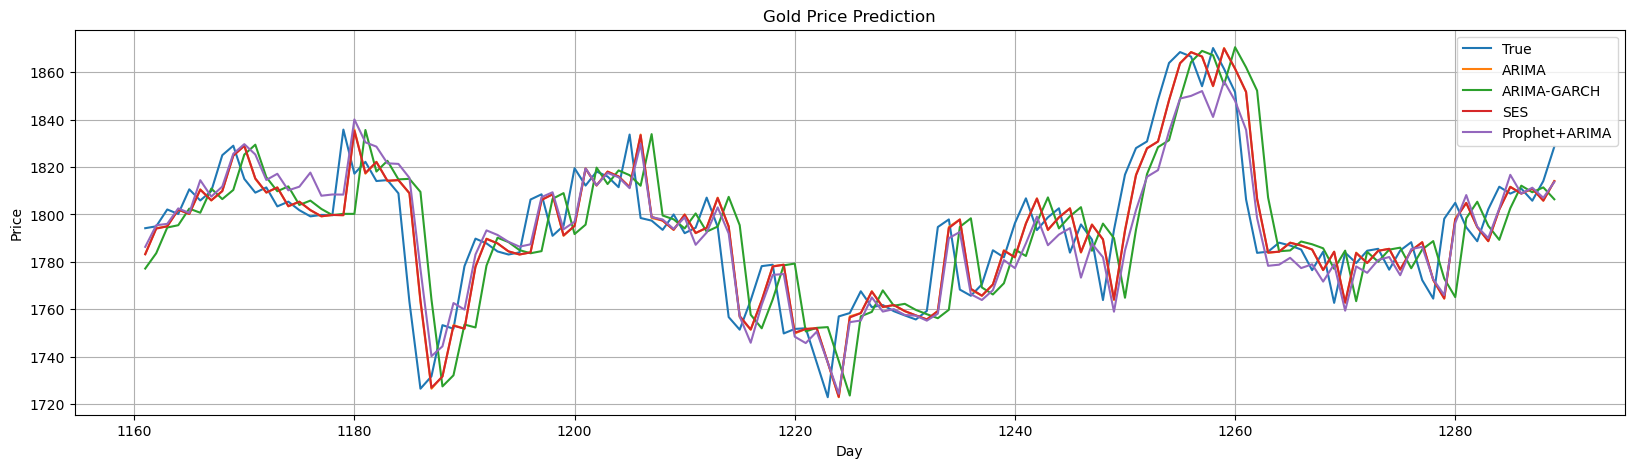

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 1 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/1_5step.png')
plt.show()

print('MAE')
exchange1_mae

### 2 (5 step)

In [3]:
exchange2_result = pd.read_csv('./results/exchange2_5step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_5step_rate_mae.csv')
exchange2_mae = MAE.iloc[2]

In [4]:
table = exchange2_result
x = np.arange(len(table['ds']))+7588 - 1517

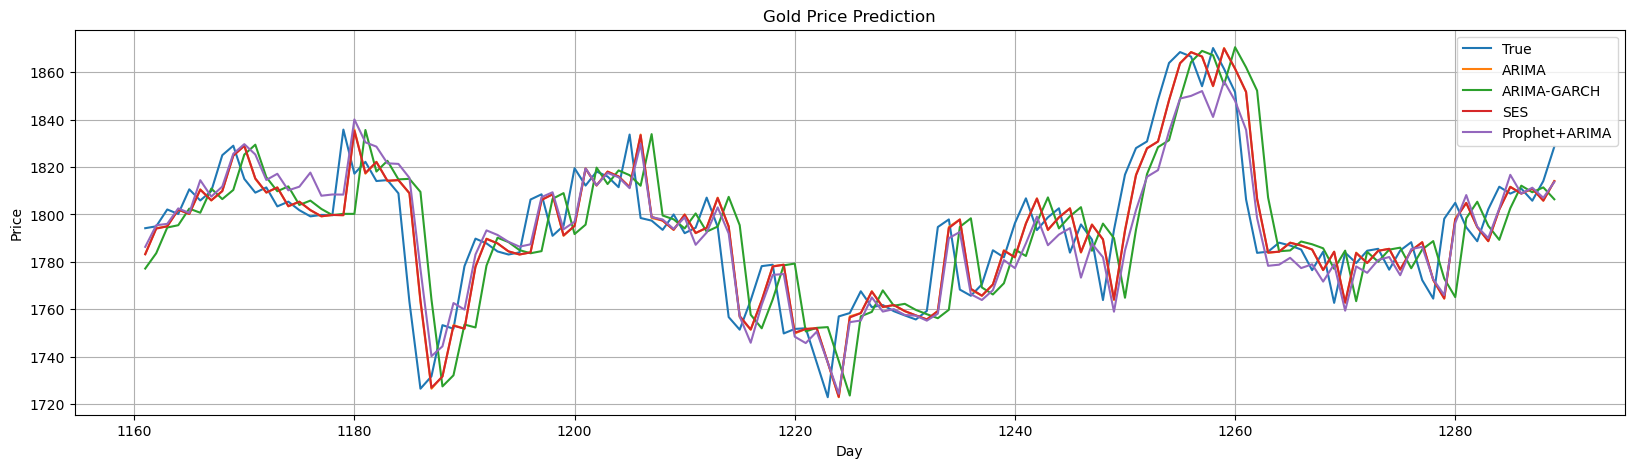

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 2 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/2_5step.png')
plt.show()

print('MAE')
exchange2_mae

### 3 (5 step)

In [3]:
exchange3_result = pd.read_csv('./results/exchange3_5step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_5step_rate_mae.csv')
exchange3_mae = MAE.iloc[3]

In [4]:
table = exchange3_result
x = np.arange(len(table['ds']))+7588 - 1517

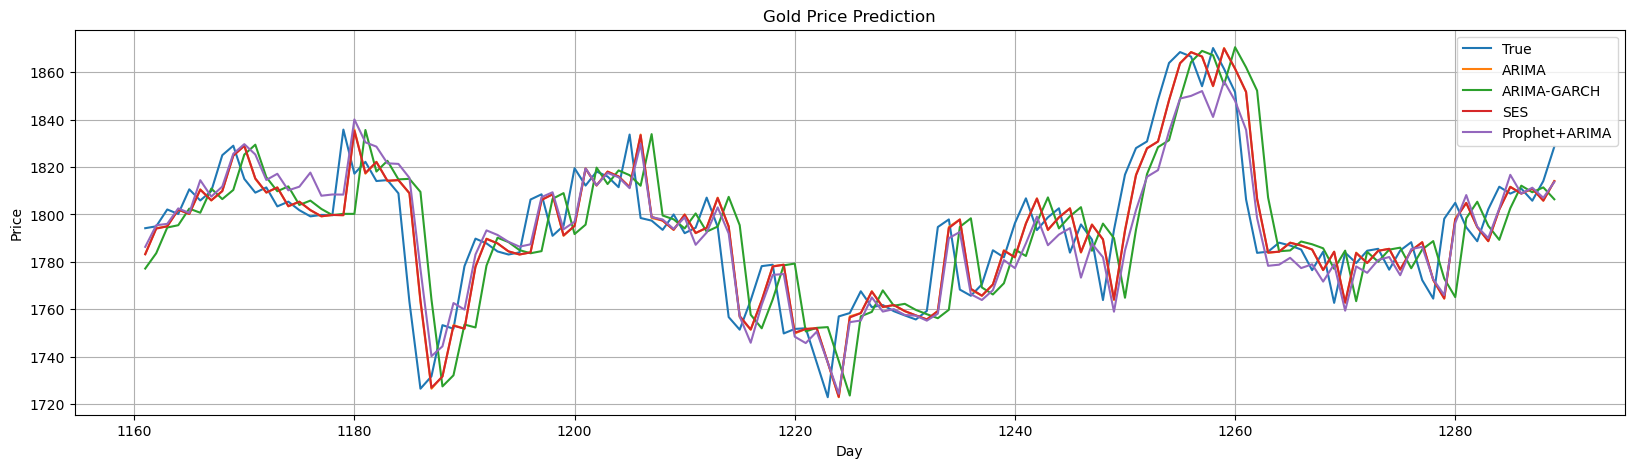

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 3 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/3_5step.png')
plt.show()

print('MAE')
exchange3_mae

### 4 (5 step)

In [3]:
exchange4_result = pd.read_csv('./results/exchange4_5step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_5step_rate_mae.csv')
exchange4_mae = MAE.iloc[4]

In [4]:
table = exchange4_result
x = np.arange(len(table['ds']))+7588 - 1517

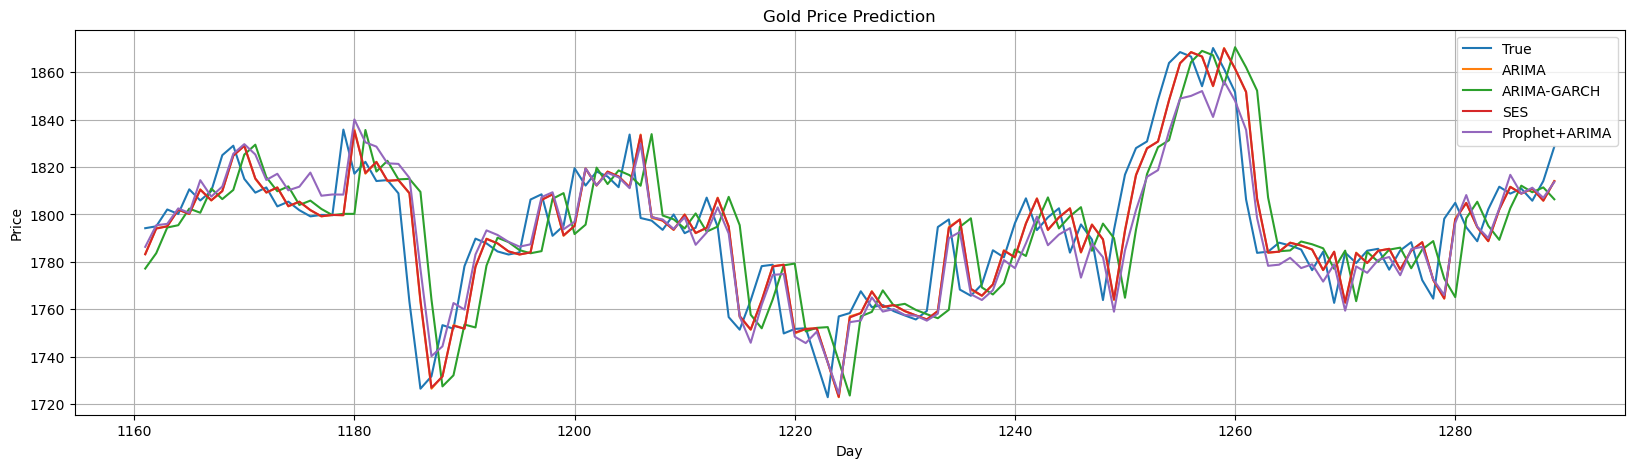

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 4 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/4_5step.png')
plt.show()

print('MAE')
exchange4_mae

### 5 (5 step)

In [3]:
exchange5_result = pd.read_csv('./results/exchange5_5step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_5step_rate_mae.csv')
exchange5_mae = MAE.iloc[5]

In [4]:
table = exchange5_result
x = np.arange(len(table['ds']))+7588 - 1517

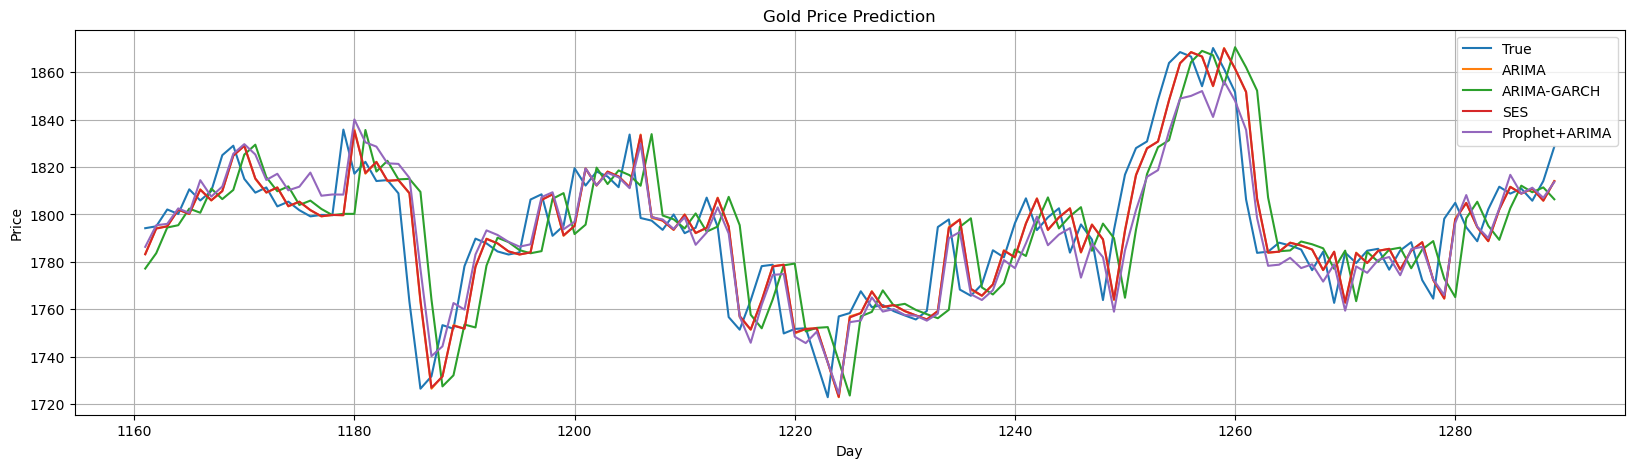

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 5 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/5_5step.png')
plt.show()

print('MAE')
exchange5_mae

### 6 (5 step)

In [3]:
exchange6_result = pd.read_csv('./results/exchange6_5step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_5step_rate_mae.csv')
exchange6_mae = MAE.iloc[6]

In [4]:
table = exchange6_result
x = np.arange(len(table['ds']))+7588 - 1517

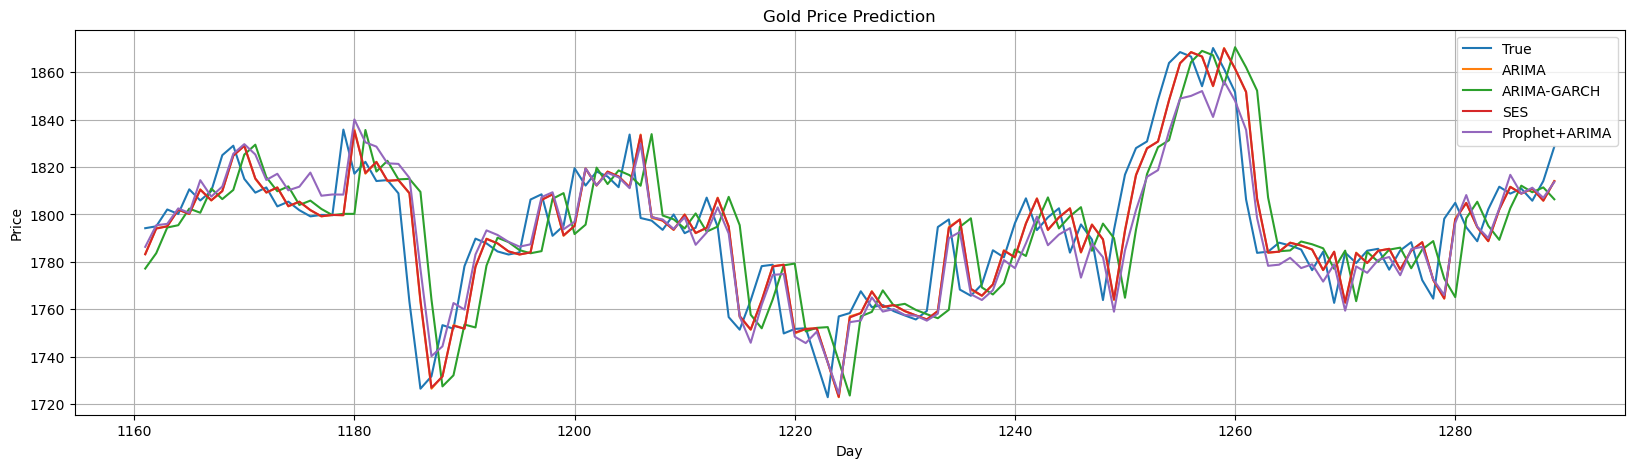

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 6 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/6_5step.png')
plt.show()

print('MAE')
exchange6_mae

### OT (5 step)

In [3]:
exchangeOT_result = pd.read_csv('./results/exchangeOT_5step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_5step_rate_mae.csv')
exchangeOT_mae = MAE.iloc[7]

In [4]:
table = exchangeOT_result
x = np.arange(len(table['ds']))+7588 - 1517

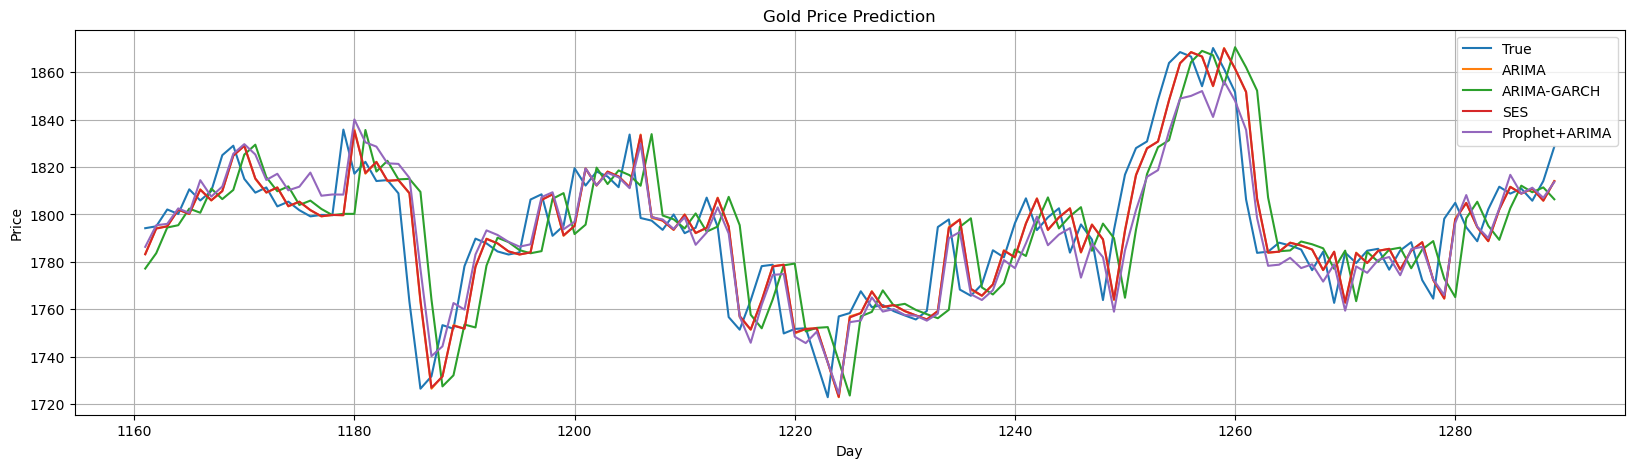

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange OT Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/OT_5step.png')
plt.show()

print('MAE')
exchangeOT_mae

### 0 (10 step)

In [3]:
exchange0_result = pd.read_csv('./results/exchange0_10step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_10step_rate_mae.csv')
exchange0_mae = MAE.iloc[0]

In [4]:
table = exchange0_result
x = np.arange(len(table['ds']))+7588 - 1517

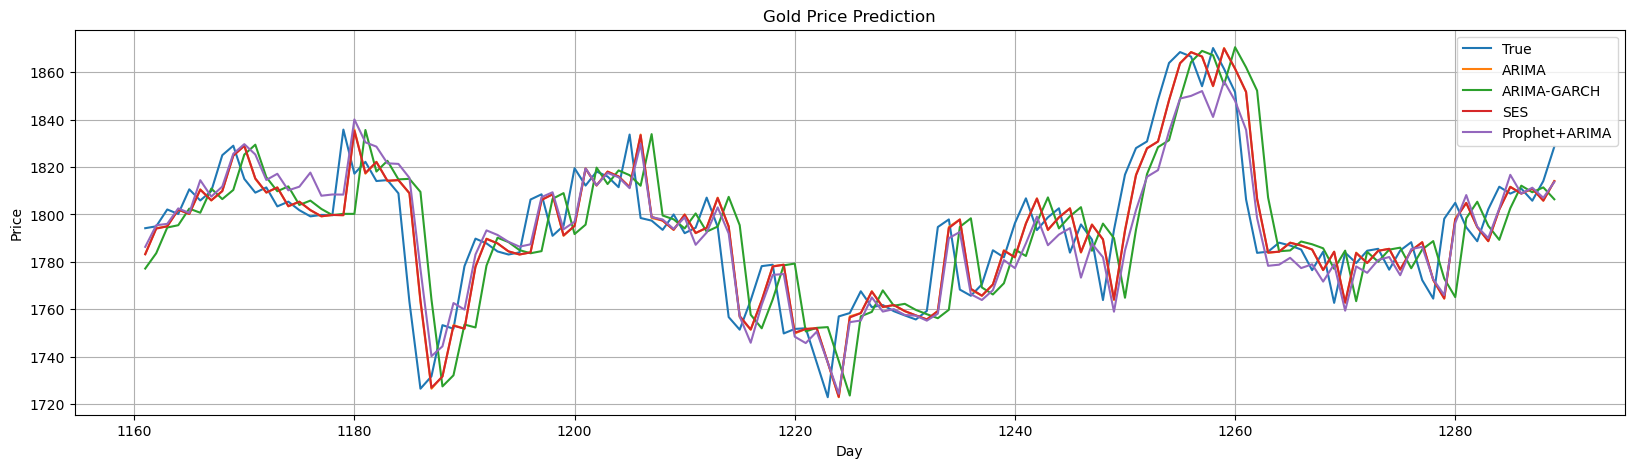

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 0 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/0_10step.png')
plt.show()

print('MAE')
exchange0_mae

### 1 (10 step)

In [3]:
exchange1_result = pd.read_csv('./results/exchange1_10step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_10step_rate_mae.csv')
exchange1_mae = MAE.iloc[1]

In [4]:
table = exchange1_result
x = np.arange(len(table['ds']))+7588 - 1517

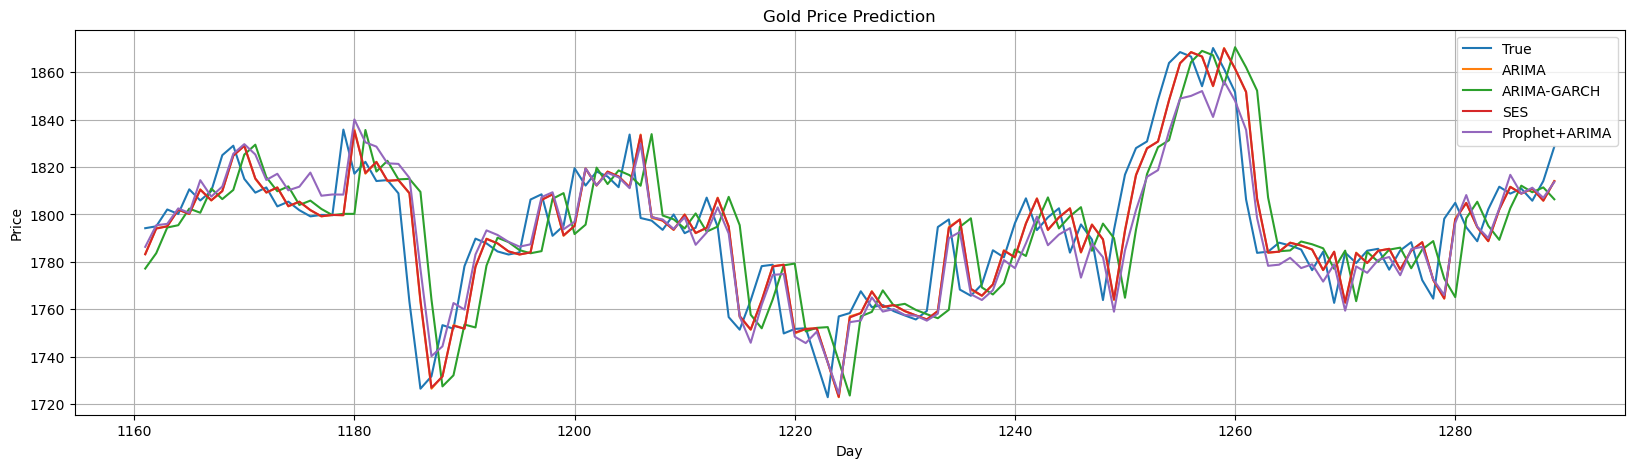

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 1 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/1_10step.png')
plt.show()

print('MAE')
exchange1_mae

### 2 (10 step)

In [3]:
exchange2_result = pd.read_csv('./results/exchange2_10step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_10step_rate_mae.csv')
exchange2_mae = MAE.iloc[2]

In [4]:
table = exchange2_result
x = np.arange(len(table['ds']))+7588 - 1517

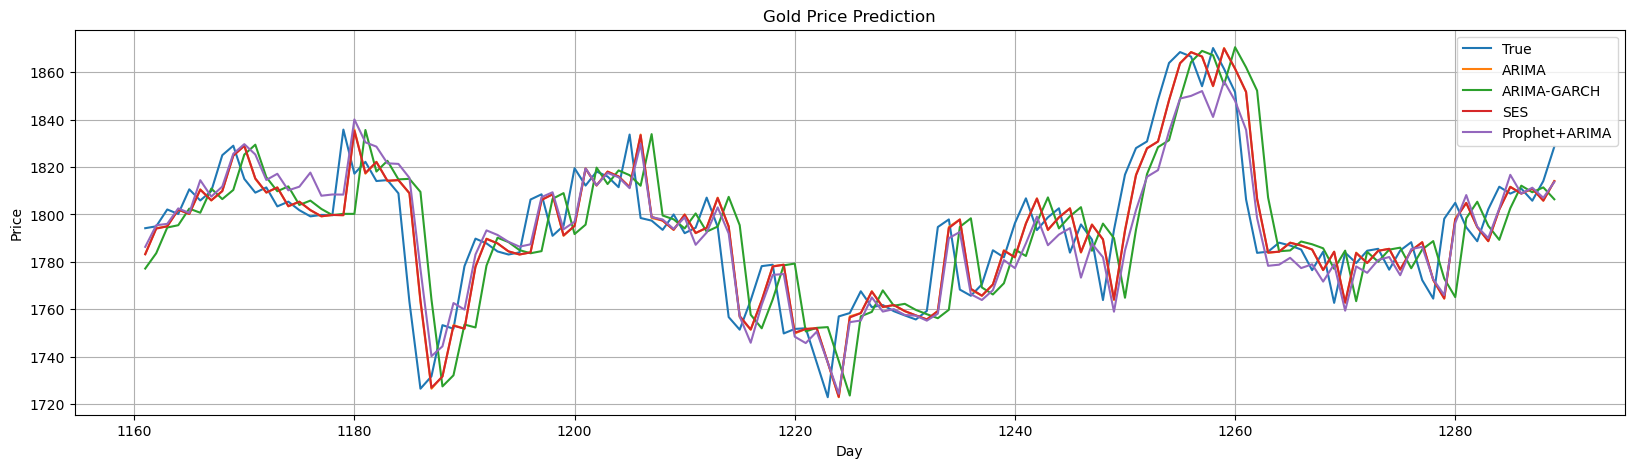

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 2 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/2_10step.png')
plt.show()

print('MAE')
exchange2_mae

### 3 (10 step)

In [3]:
exchange3_result = pd.read_csv('./results/exchange3_10step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_10step_rate_mae.csv')
exchange3_mae = MAE.iloc[3]

In [4]:
table = exchange3_result
x = np.arange(len(table['ds']))+7588 - 1517

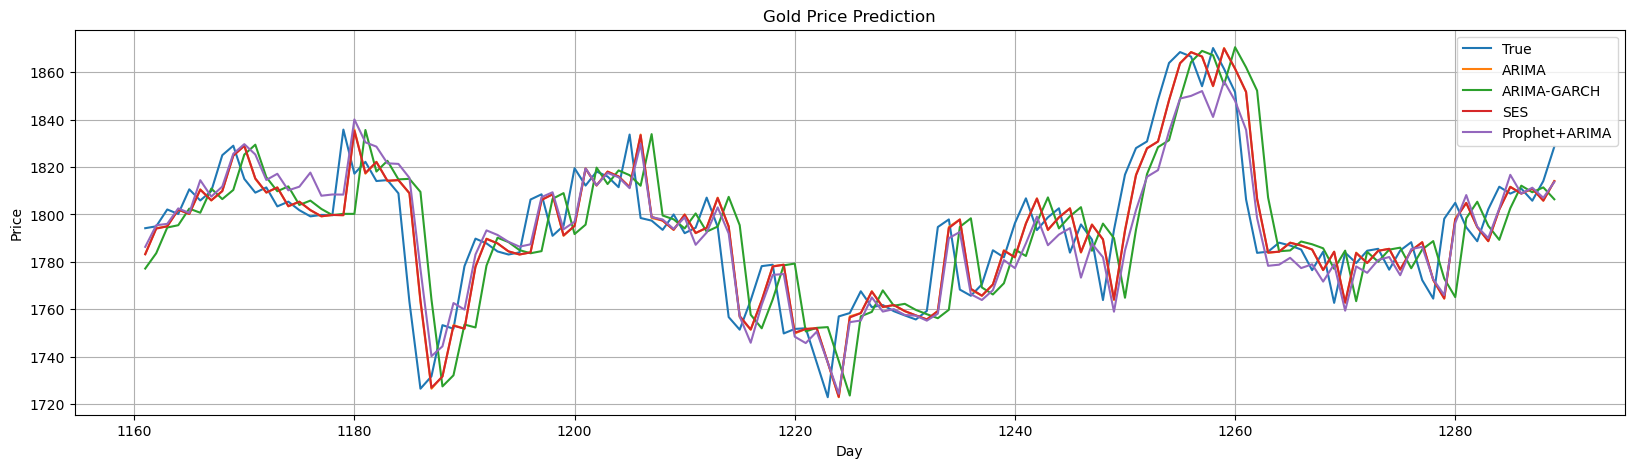

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 3 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/3_10step.png')
plt.show()

print('MAE')
exchange3_mae

### 4 (10 step)

In [3]:
exchange4_result = pd.read_csv('./results/exchange4_10step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_10step_rate_mae.csv')
exchange4_mae = MAE.iloc[4]

In [4]:
table = exchange4_result
x = np.arange(len(table['ds']))+7588 - 1517

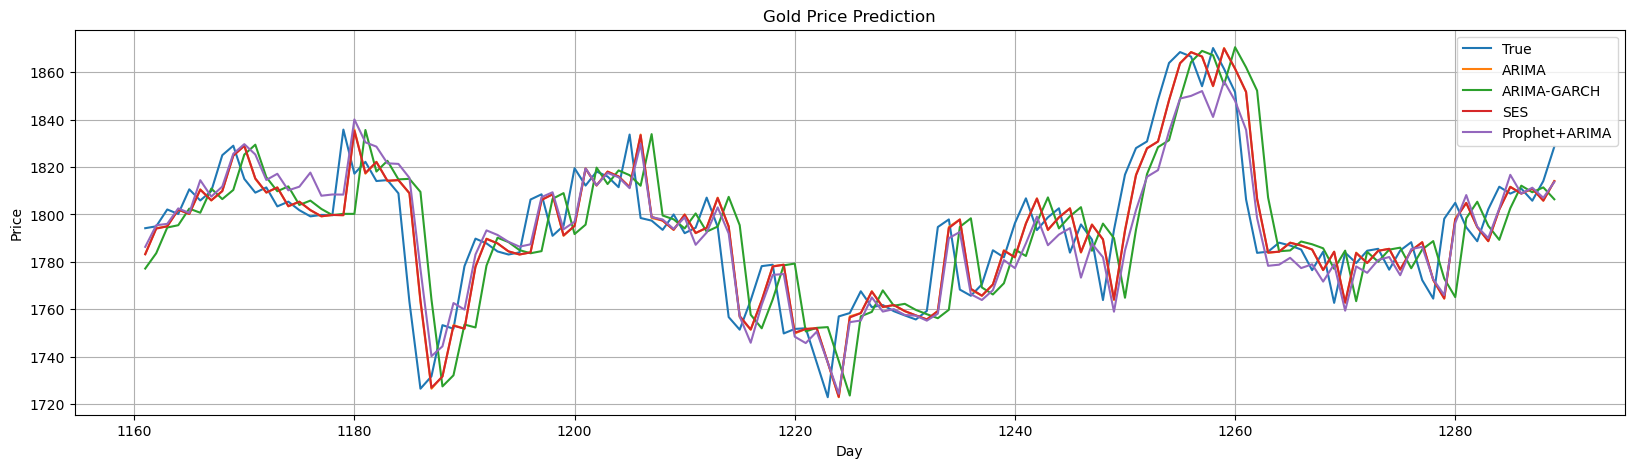

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 4 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/4_10step.png')
plt.show()

print('MAE')
exchange4_mae

### 5 (10 step)

In [3]:
exchange5_result = pd.read_csv('./results/exchange5_10step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_10step_rate_mae.csv')
exchange5_mae = MAE.iloc[5]

In [4]:
table = exchange5_result
x = np.arange(len(table['ds']))+7588 - 1517

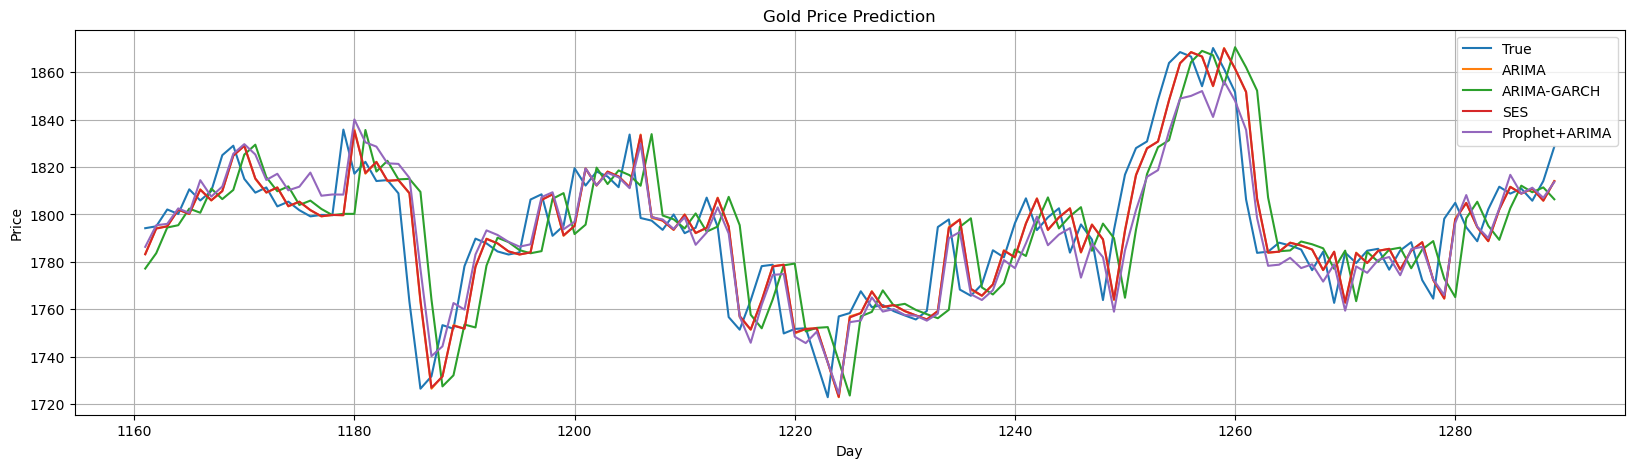

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 5 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/5_10step.png')
plt.show()

print('MAE')
exchange5_mae

### 6 (10 step)

In [3]:
exchange6_result = pd.read_csv('./results/exchange6_10step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_10step_rate_mae.csv')
exchange6_mae = MAE.iloc[6]

In [4]:
table = exchange6_result
x = np.arange(len(table['ds']))+7588 - 1517

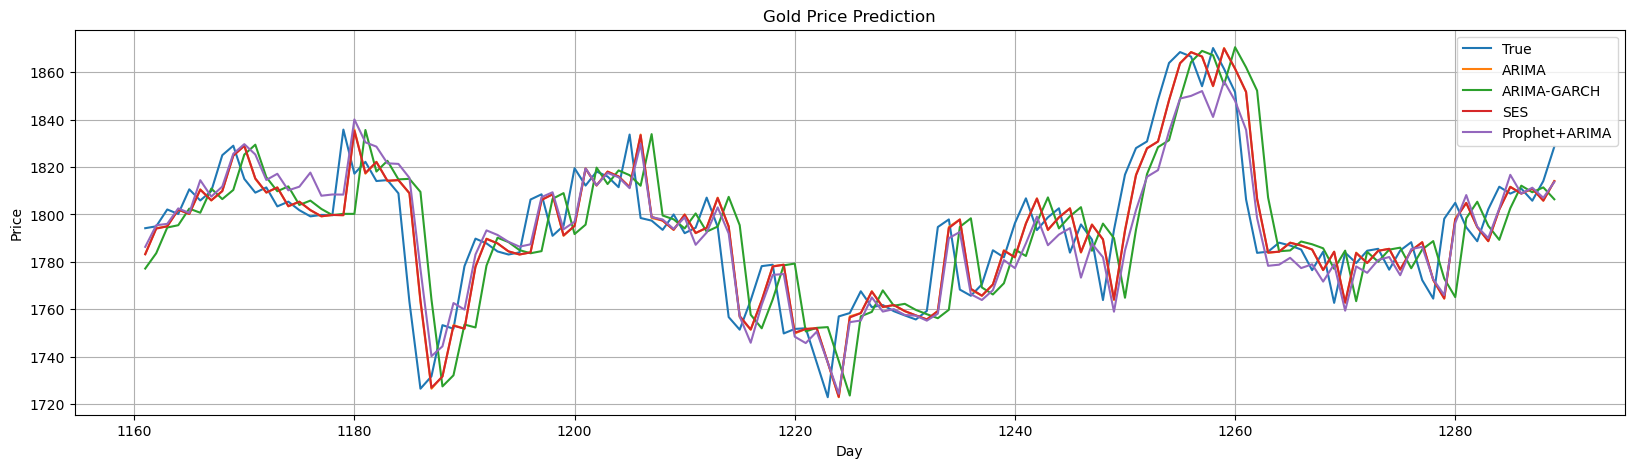

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange 6 Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/6_10step.png')
plt.show()

print('MAE')
exchange6_mae

### OT (10 step)

In [3]:
exchangeOT_result = pd.read_csv('./results/exchangeOT_10step_forecasting.csv')
MAE = pd.read_csv('./results/exchange_10step_rate_mae.csv')
exchangeOT_mae = MAE.iloc[7]

In [4]:
table = exchangeOT_result
x = np.arange(len(table['ds']))+7588 - 1517

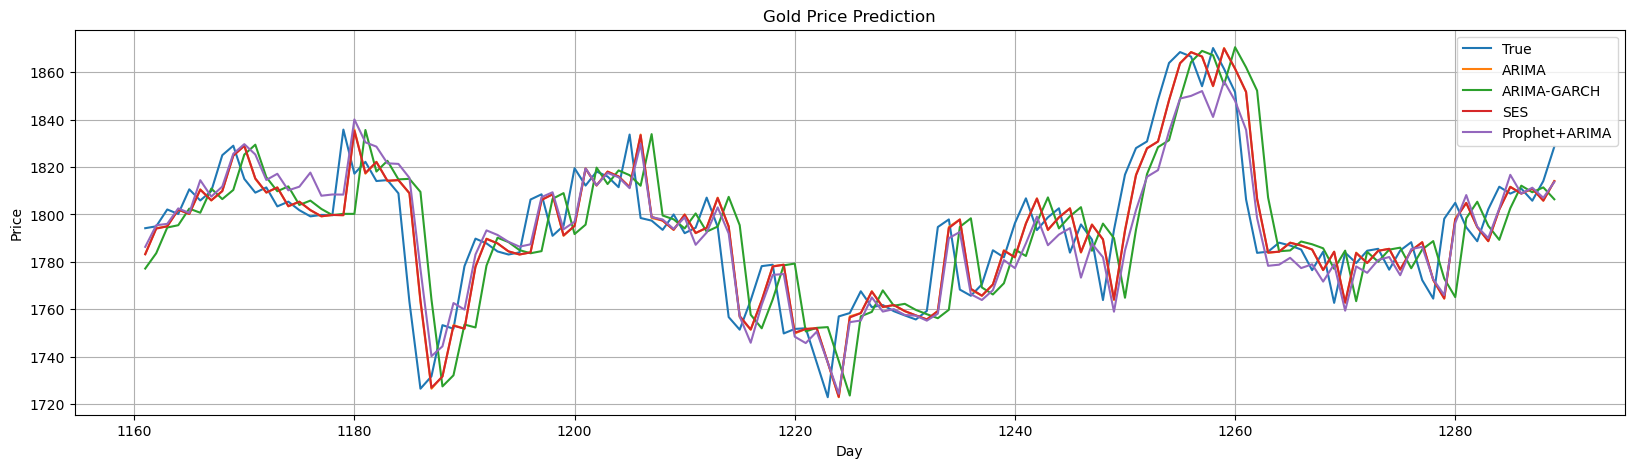

MAE


Unnamed: 0                             Gold 1 step
ARIMA                                    10.647287
ARIMA 2                                  10.718474
ARIMA 3                                  10.657627
ARIMA-GARCH                              15.590836
ARIMA-GARCH 2                            15.624845
ARIMA-GARCH 3                            15.567103
Simple Exponential Smoothing             10.657209
Holt's Exponential Smoothing             10.798648
Holt-Winter's Exponential Smoothing      10.966453
Prophet                                  34.473478
Prophet+ARIMA                            12.152633
Name: 0, dtype: object

In [5]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize= 10)
plt.plot(x, table['Actual'], label = 'True')
plt.plot(x,table['ARIMA'], label = 'ARIMA')
plt.plot(x,table['ARIMA-GARCH 2'], label = 'ARIMA-GARCH')
plt.plot(x,table['Simple Exponential Smoothing'], label = 'SES')
#plt.plot(x,table['Holt\s Exponential Smoothing'], label = 'Holt')
#plt.plot(x,table['Holt-Winter\s Exponential Smoothing'], label = 'Holt-Winter')
# plt.plot(x,table['Prophet'], label = 'Prophet')
plt.plot(x,table['Prophet+ARIMA'], label = 'Prophet+ARIMA')


plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Exchange OT Prediction')
plt.grid()
plt.legend()

plt.savefig('./results/OT_10step.png')
plt.show()

print('MAE')
exchangeOT_mae